<a href="https://colab.research.google.com/github/Shivswaranjay/CodeClause_Speech_Emotion_Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition

## Loading dataset from Kaggle

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!cp /content/drive/MyDrive/ML_Projects/Kaggle_API_Credential/kaggle.json ~/.kaggle/kaggle.json

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [17]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip toronto-emotional-speech-set-tess.zip

## Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import metrics
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [31]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [20]:
len(paths) 

2800

In [25]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_read_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_pass_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_pole_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_sub_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_rough_ps.wav']

In [22]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [26]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps


In [32]:
df['label'].value_counts()

ps         400
disgust    400
neutral    400
angry      400
fear       400
happy      400
sad        400
Name: label, dtype: int64

## Exploratory Data Analysis

In [36]:
sbn.countplot(df['label'])

ValueError: ignored

In [43]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

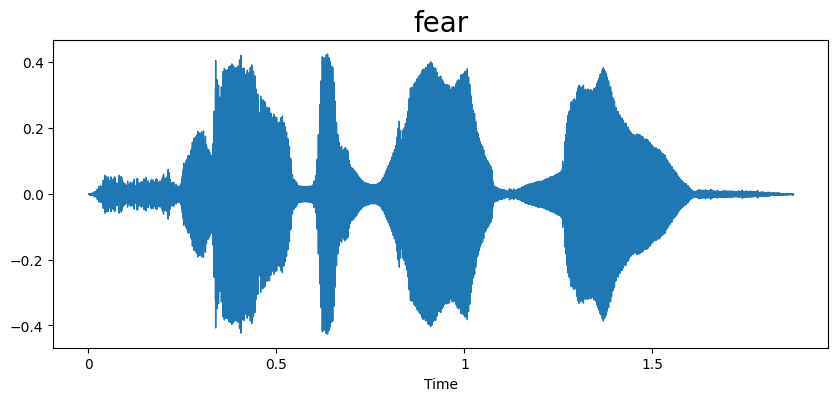

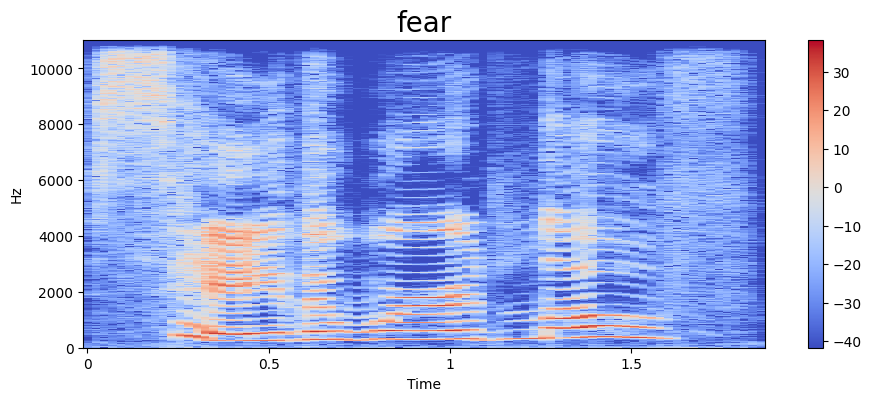

In [44]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

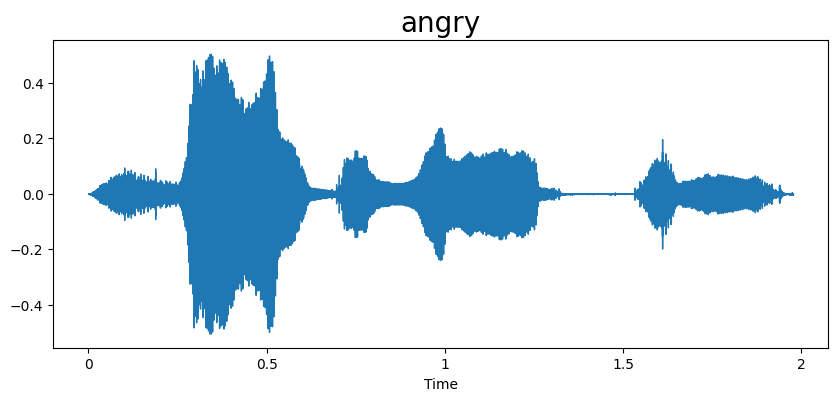

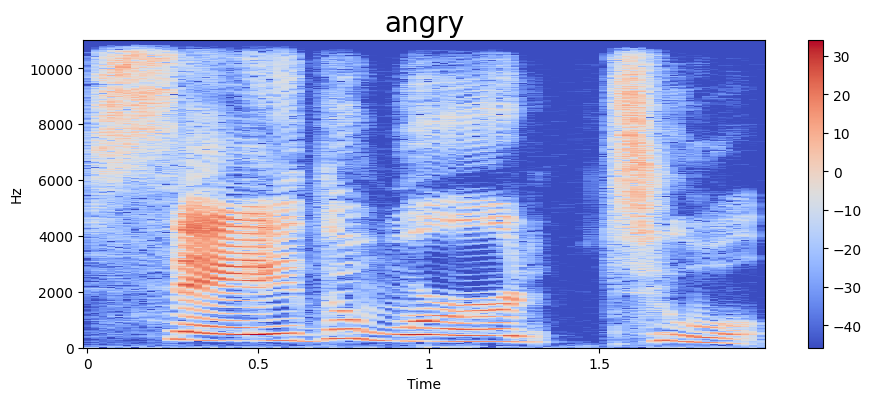

In [45]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

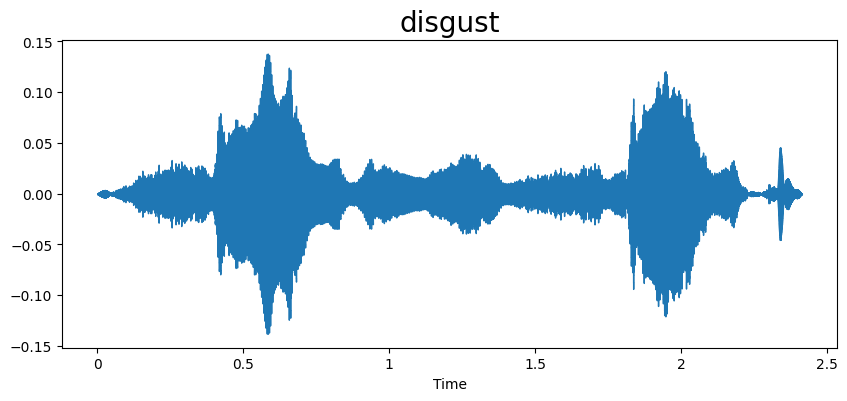

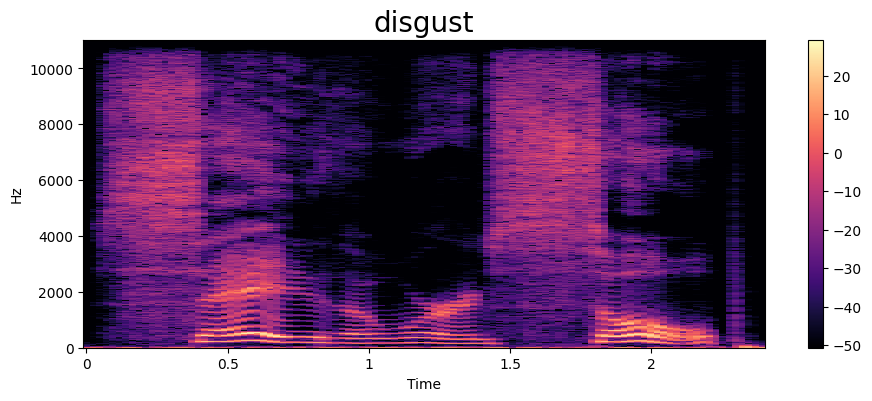

In [46]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

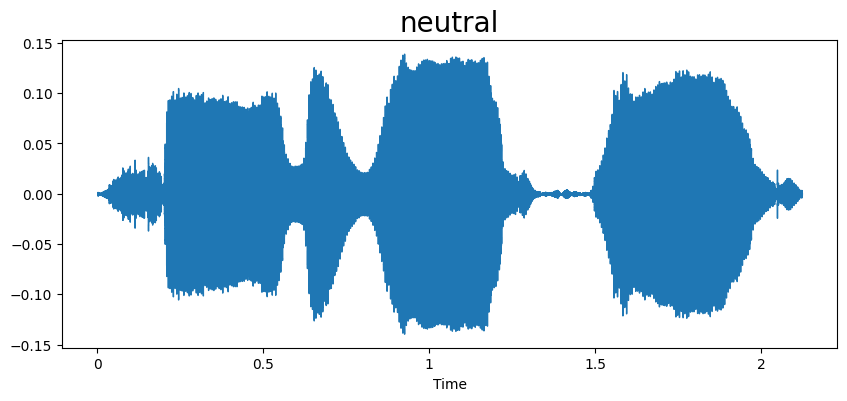

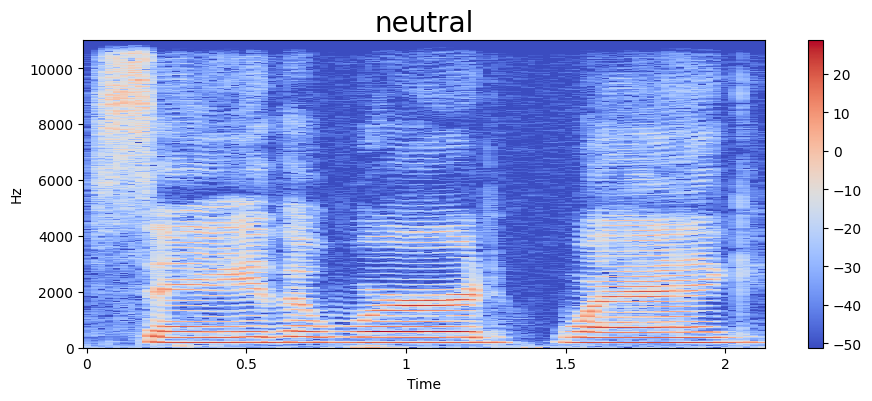

In [47]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

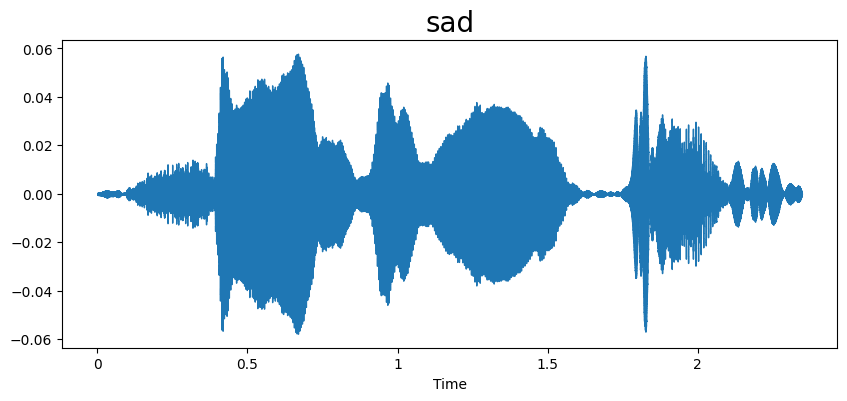

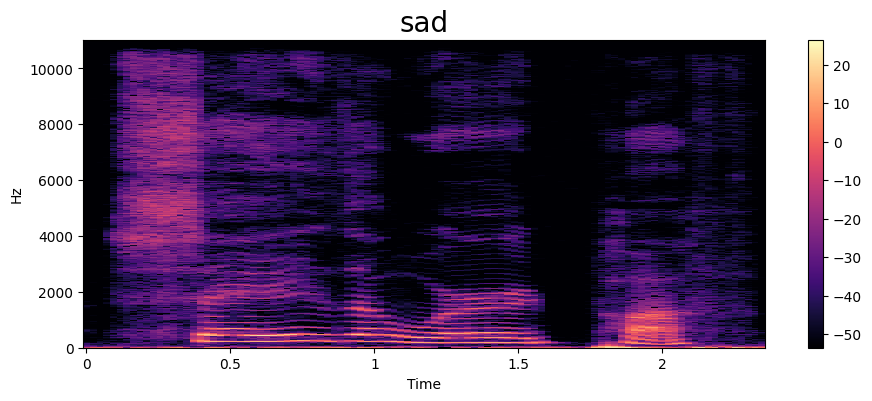

In [48]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

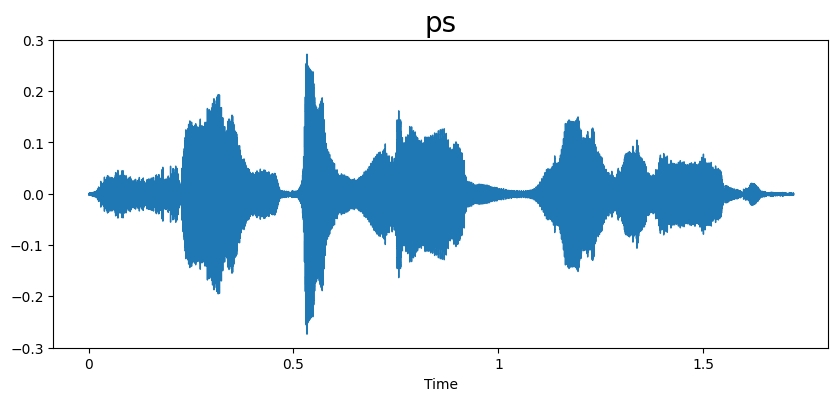

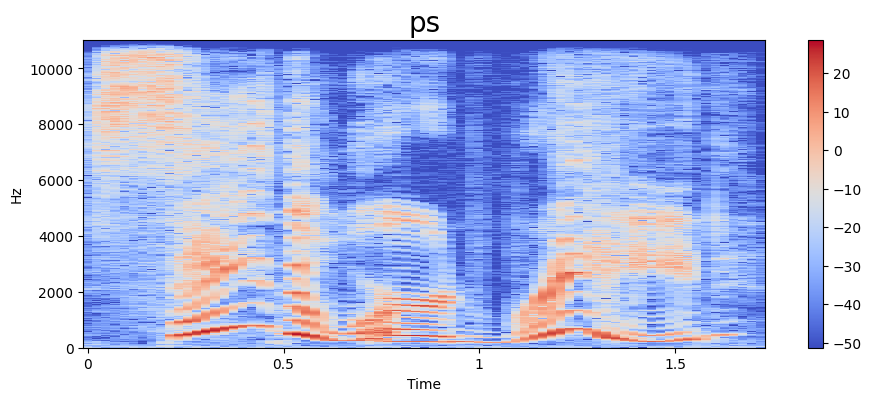

In [49]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

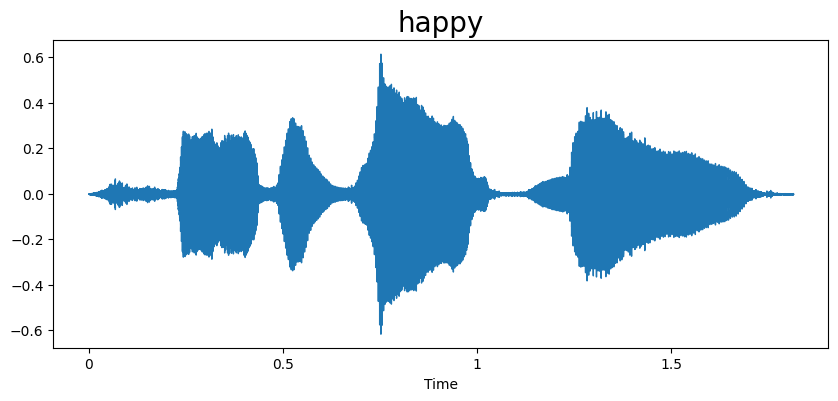

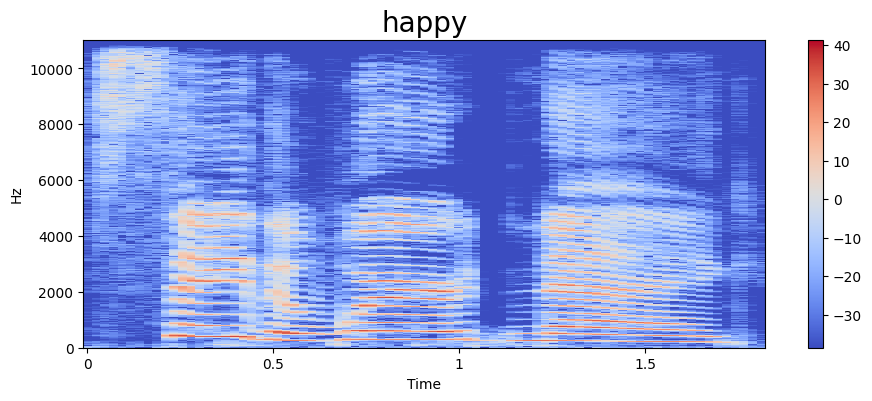

In [52]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [53]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [54]:
extract_mfcc(df['speech'][0])

array([-3.45609589e+02,  7.57064972e+01, -1.77447662e+01,  1.34391193e+01,
       -2.01383972e+01, -1.19122829e+01, -6.20053625e+00, -2.76177959e+01,
       -1.63459492e+01, -1.17134247e+01, -1.71997852e+01,  5.18732357e+00,
       -1.29438095e+01,  1.15115948e+01, -5.48523068e-01, -3.49906713e-01,
        1.01044188e+01,  1.70300090e+00, -4.92791510e+00, -1.56519449e+00,
       -3.19727921e+00,  7.07947254e+00,  2.92783856e-01,  2.14071798e+00,
        1.81684303e+00,  2.25608635e+00,  3.69903898e+00,  7.94975328e+00,
        4.04431391e+00,  1.13448305e+01,  4.65518427e+00,  1.07820396e+01,
        7.93540907e+00,  8.40512085e+00,  3.25990415e+00,  5.21375799e+00,
       -6.28709137e-01,  5.60927677e+00,  2.96448731e+00,  3.99931908e+00],
      dtype=float32)

In [55]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [56]:
X_mfcc

0       [-345.6096, 75.7065, -17.744766, 13.439119, -2...
1       [-351.1825, 47.132416, -16.871181, -9.398885, ...
2       [-341.70773, 86.204254, -1.6080021, -6.48541, ...
3       [-320.7292, 69.31872, -8.503275, -22.18039, -1...
4       [-385.1928, 67.987404, -19.561445, -6.8946624,...
                              ...                        
2795    [-417.12173, 30.051937, -1.3907442, 6.4176693,...
2796    [-416.90005, 94.14996, -1.9918425, -20.243567,...
2797    [-436.85968, 65.910576, -1.0731975, -1.1962786...
2798    [-394.4977, 61.888035, -15.578806, -35.14207, ...
2799    [-440.64124, 68.612465, -9.215987, -26.292242,...
Name: speech, Length: 2800, dtype: object

In [57]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [58]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [59]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [60]:
y = y.toarray()

In [61]:
y.shape

(2800, 7)

In [69]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Create the LSTM Model

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

In [2]:
model.save("file.h5")

NameError: ignored

In [72]:
y_test_dummies = pd.get_dummies(history).values
print('Shape of Label tensor: ', y_test_dummies.shape)

Shape of Label tensor:  (1, 1)


In [1]:
from keras.models import load_model

model = load_model('file.h5')
scores = model.evaluate(X, y_test_dummies)

LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

OSError: ignored

In [64]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

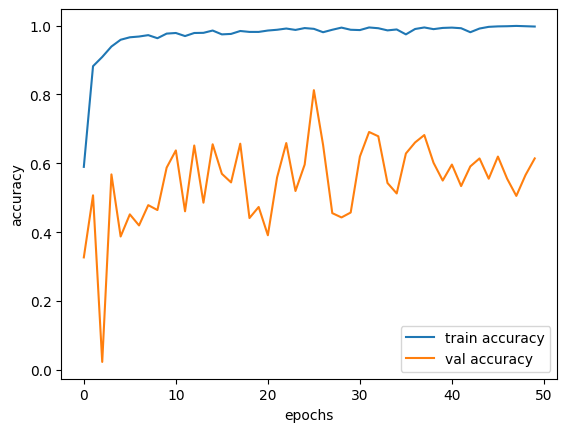

In [65]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

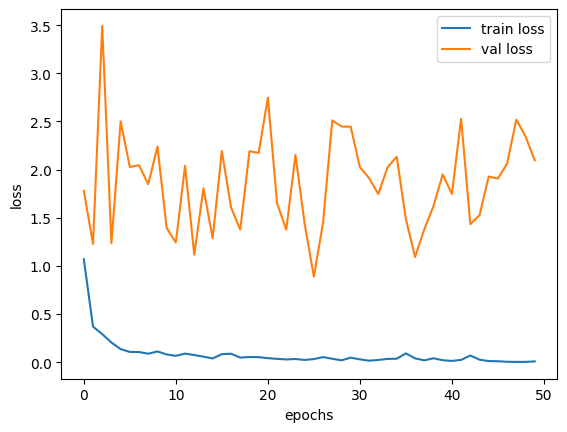

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [68]:
print("The accuracy of decision tree algorithm is : ", metrics.accuracy_score(acc, val_acc)*100)

ValueError: ignored